# Midterm-Project: Housing market study for Seattle-2014-15

In [1]:
# we need to import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from ipywidgets import interactive
import ipywidgets as widgets
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
df=pd.read_excel("Data/Data_MidTerm_Project_Real_State_Regression.xls")


In [3]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Funtions

In [4]:
def clean_data(df):
    
    df=df.drop(columns=['id', 'lat',"long","date"])
    
    return df

In [5]:
clean_data(df)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [6]:
def outliers_removal(column):
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    X[X[column] > upper_limit]

    X[X[column] < lower_limit]
    new_X = X[X[column] < upper_limit]
    new_X.shape
    new_X_cap = X.copy()
    new_X_cap[column] = np.where(
        new_X_cap[column] > upper_limit,
        upper_limit,
        np.where(
            new_X_cap[column] < lower_limit,
            lower_limit,
            new_X_cap[column]
        )
    )
    plt.figure(figsize=(8,8))

    plt.subplot(2,2,1)
    sns.boxplot(X[column])

    plt.subplot(2,2,2)
    sns.boxplot(new_X_cap[column])

    plt.show()

In [7]:
df=clean_data(df)

In [8]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


### Working with data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   waterfront     21597 non-null  int64  
 6   view           21597 non-null  int64  
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  price          21597 non-null  int64  
dtypes: float64(2), int64(15)
memory usage: 2.8 MB


### Replace "0 values" with median

We will check later if we have to deal with "0 values" from waterfront, wiews and yr_renovated

In [10]:
#df['sqft_basement']=df['sqft_basement'].replace(0,df['sqft_basement'].mean())


## Removing duplicates

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [13]:
#there are not duplicates

### creating groups of data

In [14]:
#We think the column "bathrooms" sould be binned
bins= [0,1,2,3,4,5,6,7,8]
df["bathrooms"]= pd.cut(df["bathrooms"],bins)

df


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,"(0, 1]",1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,3,"(2, 3]",2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,2,"(0, 1]",770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,4,"(2, 3]",1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,3,"(1, 2]",1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,"(2, 3]",1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,4,"(2, 3]",2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,2,"(0, 1]",1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,3,"(2, 3]",1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


In [15]:
# We also need to bin the yr_built
np.min(df["yr_built"])
np.max(df["yr_built"])
print(np.min(df["yr_built"]))
print(np.max(df["yr_built"]))            


1900
2015


In [16]:
bins= [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
labels=["00s","10s","20s","30s","40s","50s","60s","70s","80s","90s","2000s","2010s"]

df["yr_built"]= pd.cut(df["yr_built"],bins,labels=labels)

df


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,"(0, 1]",1180,5650,1.0,0,0,3,7,1180,0,50s,0,98178,1340,5650,221900
1,3,"(2, 3]",2570,7242,2.0,0,0,3,7,2170,400,50s,1991,98125,1690,7639,538000
2,2,"(0, 1]",770,10000,1.0,0,0,3,6,770,0,30s,0,98028,2720,8062,180000
3,4,"(2, 3]",1960,5000,1.0,0,0,5,7,1050,910,60s,0,98136,1360,5000,604000
4,3,"(1, 2]",1680,8080,1.0,0,0,3,8,1680,0,80s,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,"(2, 3]",1530,1131,3.0,0,0,3,8,1530,0,2000s,0,98103,1530,1509,360000
21593,4,"(2, 3]",2310,5813,2.0,0,0,3,8,2310,0,2010s,0,98146,1830,7200,400000
21594,2,"(0, 1]",1020,1350,2.0,0,0,3,7,1020,0,2000s,0,98144,1020,2007,402101
21595,3,"(2, 3]",1600,2388,2.0,0,0,3,8,1600,0,2000s,0,98027,1410,1287,400000


In [17]:
list= df[["bedrooms",'bathrooms',"floors",'waterfront','view',"condition","grade","yr_built","yr_renovated",'zipcode']]



df[["bedrooms",'bathrooms',"floors",'waterfront','view',"condition","grade","yr_built","yr_renovated",'zipcode']]=list.astype(str)



In [18]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,"(0, 1]",1180,5650,1.0,0,0,3,7,1180,0,50s,0,98178,1340,5650,221900
1,3,"(2, 3]",2570,7242,2.0,0,0,3,7,2170,400,50s,1991,98125,1690,7639,538000
2,2,"(0, 1]",770,10000,1.0,0,0,3,6,770,0,30s,0,98028,2720,8062,180000
3,4,"(2, 3]",1960,5000,1.0,0,0,5,7,1050,910,60s,0,98136,1360,5000,604000
4,3,"(1, 2]",1680,8080,1.0,0,0,3,8,1680,0,80s,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,"(2, 3]",1530,1131,3.0,0,0,3,8,1530,0,2000s,0,98103,1530,1509,360000
21593,4,"(2, 3]",2310,5813,2.0,0,0,3,8,2310,0,2010s,0,98146,1830,7200,400000
21594,2,"(0, 1]",1020,1350,2.0,0,0,3,7,1020,0,2000s,0,98144,1020,2007,402101
21595,3,"(2, 3]",1600,2388,2.0,0,0,3,8,1600,0,2000s,0,98027,1410,1287,400000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21591 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       21591 non-null  object
 1   bathrooms      21591 non-null  object
 2   sqft_living    21591 non-null  int64 
 3   sqft_lot       21591 non-null  int64 
 4   floors         21591 non-null  object
 5   waterfront     21591 non-null  object
 6   view           21591 non-null  object
 7   condition      21591 non-null  object
 8   grade          21591 non-null  object
 9   sqft_above     21591 non-null  int64 
 10  sqft_basement  21591 non-null  int64 
 11  yr_built       21504 non-null  object
 12  yr_renovated   21591 non-null  object
 13  zipcode        21591 non-null  object
 14  sqft_living15  21591 non-null  int64 
 15  sqft_lot15     21591 non-null  int64 
 16  price          21591 non-null  int64 
dtypes: int64(7), object(10)
memory usage: 3.0+ MB


### Correlation analysis

In [20]:
df.corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
sqft_living,1.000000,0.173438,0.876446,0.435155,0.756382,0.184317,0.701924
sqft_lot,0.173438,1.000000,0.184143,0.015386,0.144747,0.718198,0.089862
sqft_above,0.876446,0.184143,1.000000,-0.052131,0.731753,0.195072,0.605376
sqft_basement,0.435155,0.015386,-0.052131,1.000000,0.200449,0.017513,0.323812
sqft_living15,0.756382,0.144747,0.731753,0.200449,1.000000,0.183485,0.585238
sqft_lot15,0.184317,0.718198,0.195072,0.017513,0.183485,1.000000,0.082825
price,0.701924,0.089862,0.605376,0.323812,0.585238,0.082825,1.000000


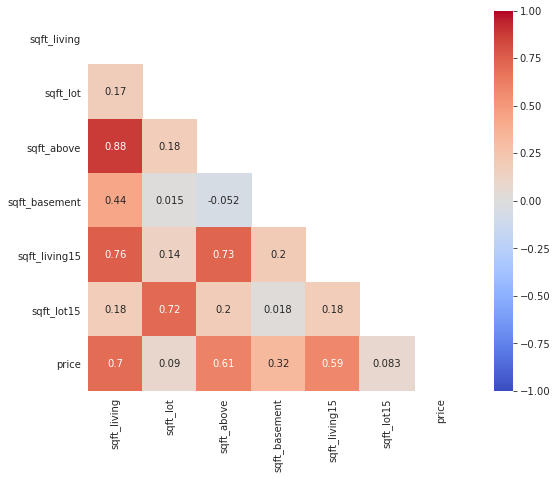

In [21]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [22]:
df.drop(columns=["sqft_living","sqft_lot","sqft_above","sqft_basement"], inplace=True)

In [23]:
df

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,3,"(0, 1]",1.0,0,0,3,7,50s,0,98178,1340,5650,221900
1,3,"(2, 3]",2.0,0,0,3,7,50s,1991,98125,1690,7639,538000
2,2,"(0, 1]",1.0,0,0,3,6,30s,0,98028,2720,8062,180000
3,4,"(2, 3]",1.0,0,0,5,7,60s,0,98136,1360,5000,604000
4,3,"(1, 2]",1.0,0,0,3,8,80s,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,"(2, 3]",3.0,0,0,3,8,2000s,0,98103,1530,1509,360000
21593,4,"(2, 3]",2.0,0,0,3,8,2010s,0,98146,1830,7200,400000
21594,2,"(0, 1]",2.0,0,0,3,7,2000s,0,98144,1020,2007,402101
21595,3,"(2, 3]",2.0,0,0,3,8,2000s,0,98027,1410,1287,400000


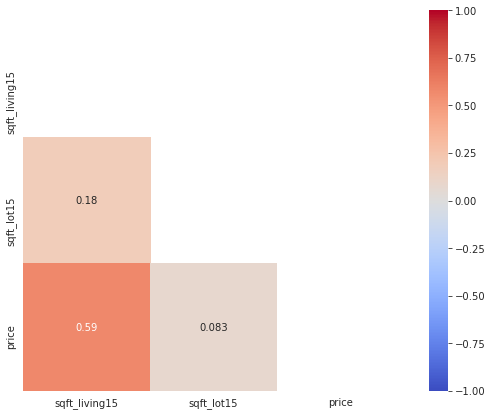

In [24]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [25]:
df.corr()

,sqft_living15,sqft_lot15,price
sqft_living15,1.000000,0.183485,0.585238
sqft_lot15,0.183485,1.000000,0.082825
price,0.585238,0.082825,1.000000


In [26]:
df.corr().to_csv("correllation.csv")

In [27]:
X=df._get_numeric_data()

In [28]:
X

,sqft_living15,sqft_lot15,price
0,1340,5650,221900
1,1690,7639,538000
2,2720,8062,180000
3,1360,5000,604000
4,1800,7503,510000
...,...,...,...
21592,1530,1509,360000
21593,1830,7200,400000
21594,1020,2007,402101
21595,1410,1287,400000


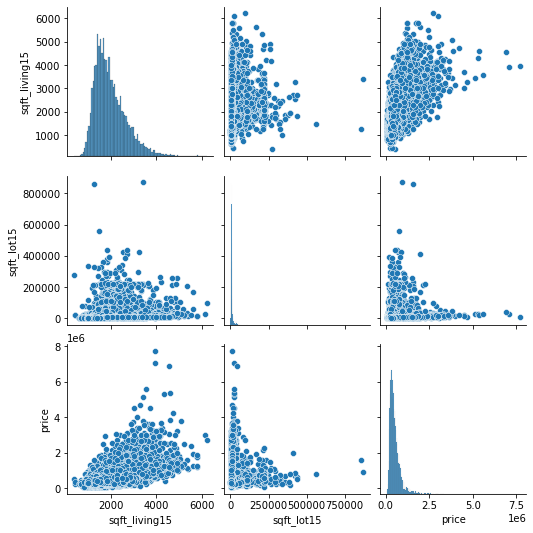

In [29]:
sns.pairplot(X)

### Removing outliers from numerical variables

<AxesSubplot:>

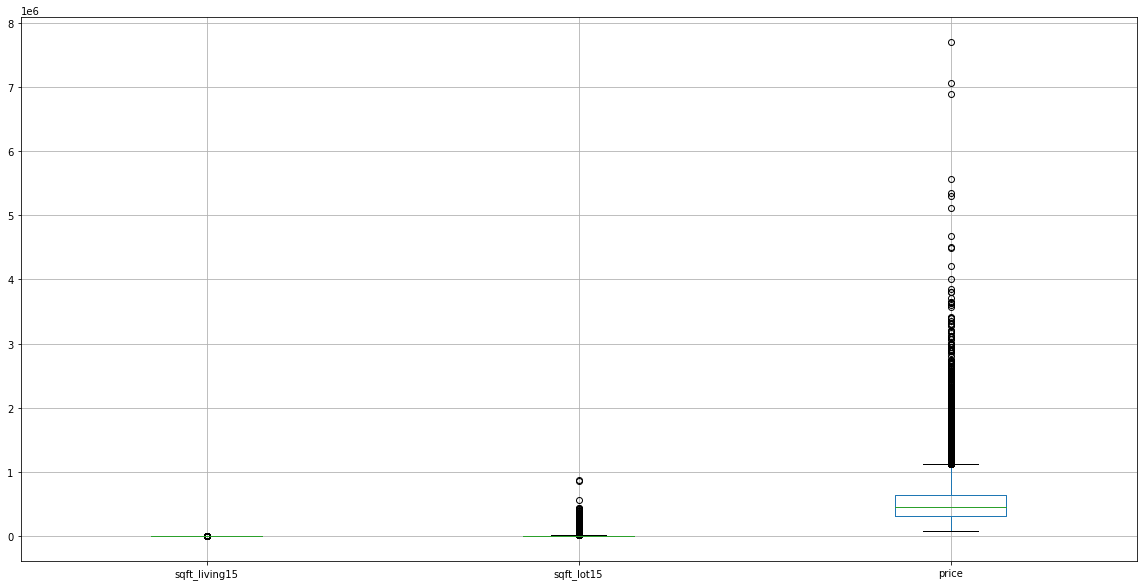

In [30]:
X.boxplot(figsize=(20,10))

In [31]:
#we have outliers in "sqft_lot15" and "price"

C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


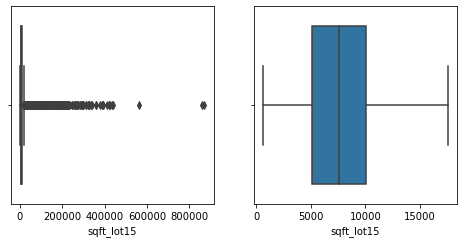

In [32]:
outliers_removal("sqft_lot15")

In [33]:
df["sqft_lot15"]=df[df["sqft_lot15"]<200000]

C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\merce\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


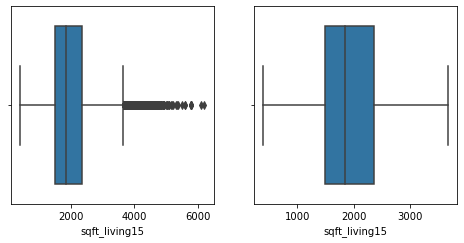

In [34]:
outliers_removal("sqft_living15")

In [35]:
df["sqft_living15"]=df[df["sqft_living15"]<4000]

In [36]:
x=df._get_numeric_data()

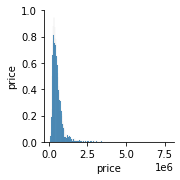

In [37]:
sns.pairplot(x)

### Normality of the numerical variables

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

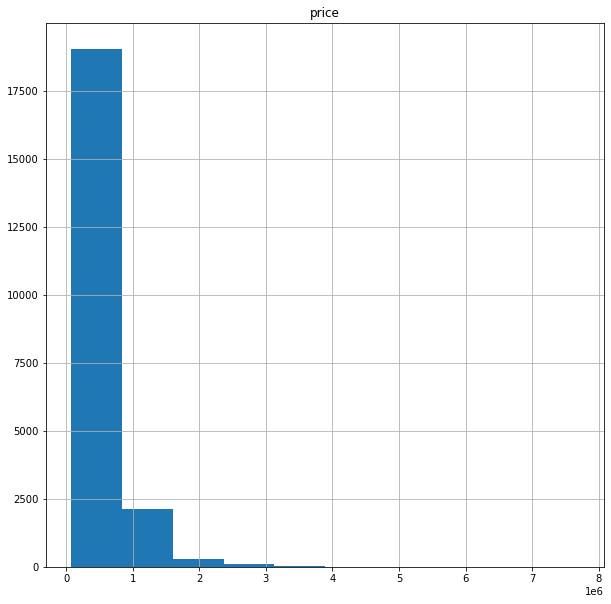

In [38]:
x.hist(figsize=(10,10))

In [39]:
# We use Power Transformation to transform all variables into normal distribution

#sns.distplot((df['sqft_basement']), bins=20)

In [40]:
#pt = PowerTransformer(method="box-cox")
#med_sqft_basement_trans=pt.fit_transform(df['sqft_basement'].to_numpy().reshape(-1,1))
#sns.displot(med_sqft_basement_trans)

### predective modeling

### XY split

In [41]:
# "price" is our dependent variable. 
# We have to separate our target variable from the others
X=df.drop('price', axis=1)
Y=df.price

In [42]:
X=X._get_numeric_data()

In [43]:
X

""
0
1
2
3
4
...
21592
21593
21594
21595


### Normalize

In [44]:

X_scaled=StandardScaler().fit_transform(X)

ValueError: at least one array or dtype is required

In [ ]:
# we get our train and test data set
X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=0.20, random_state=1000)

### Hot coding Categorical Variables¶

In [ ]:
categorical_df=df.select_dtypes('object')

In [ ]:
categorical_df

In [ ]:
# we get dummies for categorical variables
categorical_df=pd.get_dummies(df, drop_first=True)

In [ ]:
categorical_df

### apply linear regresion

modeling using statsmodels

In [ ]:
# We need to concat the numberical (X) and the catogorical variables:

X=pd.concat([X, categorical_df], axis=1) # concat numerical and categorical transformations

Without Scaling

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.20,random_state=1000 )

In [ ]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
X_train_constant= sm.add_constant(X_train)
X_test_constant= sm.add_constant(X_test)  #adding a constant
model=sm.OLS(y_train,X_train_constant).fit()
predictions=model.predict(X_test_constant)

print_model=model.summary()
print(print_model)


In [ ]:
X_train

scaled

In [ ]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [ ]:
X_train_scaled_constant= sm.add_constant(X_train_scaled)
X_test_scaled_constant= sm.add_constant(X_test_scaled)  #adding a constant

model=sm.OLS(y_train,X_train_scaled_constant).fit()
predictions=model.predict(X_test_scaled_constant)

print_model=model.summary()
print(print_model)

In [ ]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)


### Modeling using Scikit Learn

In [ ]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train) 

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.score(X_test_scaled,y_test)

In [ ]:
y_pred=model.predict(X_test_scaled) 

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

In [ ]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, "o",color="blue")
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o",color="blue")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"})